In [1]:
import os
from dotenv import load_dotenv

In [2]:
load_dotenv()
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [3]:
model_name="deepseek-r1-distill-llama-70b"

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(model_name=model_name)

In [6]:
print(llm.invoke("What is your name?").content)

<think>
Greetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek. I'm at your service and would be delighted to assist you with any inquiries or tasks you may have.
</think>

Greetings! I'm DeepSeek-R1, an artificial intelligence assistant created by DeepSeek. I'm at your service and would be delighted to assist you with any inquiries or tasks you may have.


In [63]:
import operator
from typing import List
from pydantic import BaseModel,Field
from typing import TypedDict,Annotated,Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.prompts import PromptTemplate,ChatPromptTemplate
from langchain_core.messages import AIMessage,HumanMessage
from langgraph.graph import Graph,StateGraph,MessagesState,START,END
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode

In [35]:
def call_model(state:MessagesState):
    question=state['messages']
    
    print(f"Current messages: {question}")
    response=llm.invoke(question)
    return {"messages":[response]}

In [36]:
state={'messages':["Hello How are you?"]}

In [37]:
call_model(state)

Current messages: ['Hello How are you?']


{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 8, 'total_tokens': 50, 'completion_time': 0.197598225, 'prompt_time': 0.000156168, 'queue_time': 0.056653922, 'total_time': 0.197754393}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--0ce22540-2462-4f24-a279-b5198f1cab49-0', usage_metadata={'input_tokens': 8, 'output_tokens': 42, 'total_tokens': 50})]}

In [38]:
workflow=StateGraph(MessagesState)

In [39]:
workflow.add_node('mybot',call_model)

In [40]:
workflow.add_edge(START,'mybot')

In [41]:
workflow.add_edge('mybot',END)

In [42]:
app=workflow.compile()

In [43]:
from IPython.display import display,Image

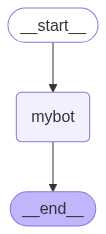

In [44]:
display(Image(app.get_graph().draw_mermaid_png()))

In [45]:
state={"messages":["What is gdp of India?"]}

In [46]:
app.invoke(state)

Current messages: [HumanMessage(content='What is gdp of India?', additional_kwargs={}, response_metadata={}, id='47356288-df5a-4957-8415-fc6ff56b1b59')]


{'messages': [HumanMessage(content='What is gdp of India?', additional_kwargs={}, response_metadata={}, id='47356288-df5a-4957-8415-fc6ff56b1b59'),
  AIMessage(content="<think>\n\n</think>\n\nAs of the latest available data, India's GDP (Gross Domestic Product) is approximately **$3.4 trillion** (nominal, 2023 estimates). This makes India the **5th largest economy** in the world, surpassing the UK. \n\nFor more precise and updated figures, you can refer to recent reports from sources like the **International Monetary Fund (IMF)** or India's **National Statistical Office (NSO)**.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 96, 'prompt_tokens': 10, 'total_tokens': 106, 'completion_time': 0.35852819, 'prompt_time': 0.000363515, 'queue_time': 0.195648604, 'total_time': 0.358891705}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--3ed110f1-8c26-439b-9c85-feefdc3e9fa

In [48]:
for output in app.stream(state):

    for key,value in output.items():
        print("This is from node: ",key)
        print("--------")
        print(value)
        print("\n")

Current messages: [HumanMessage(content='What is gdp of India?', additional_kwargs={}, response_metadata={}, id='02963f8a-c37d-459c-9068-a136623ce97b')]
This is from node:  mybot
--------
{'messages': [AIMessage(content="<think>\n\n</think>\n\nAs of the latest available data, India's GDP (Gross Domestic Product) is approximately **$3.4 trillion** (nominal) and around **$11.5 trillion** (PPP) as of 2023. For the most accurate and up-to-date information, refer to the latest reports from the **World Bank** or **IMF**.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 79, 'prompt_tokens': 10, 'total_tokens': 89, 'completion_time': 0.29043365, 'prompt_time': 0.000191187, 'queue_time': 0.053363224, 'total_time': 0.290624837}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--5b95325c-c6b5-4654-a824-24e2803ada40-0', usage_metadata={'input_tokens': 10, 'output_tokens': 79, 'to

## Tool integration

In [49]:
@tool
def temp_search(query:str):
    """This is for searching temperature of any place"""
    if 'delhi' in query.lower():
        return "The Temp is 45 C and sunny."
    return "The temp is 25 C and cloudy."

In [50]:
temp_search.invoke("What is the weather of Kolkata")

'The temp is 25 C and cloudy.'

In [51]:
temp_search.invoke("What is the weather of Delhi")

'The Temp is 45 C and sunny.'

In [52]:
tools=[temp_search]

In [53]:
llm_with_tool=llm.bind_tools(tools)

In [58]:
llm.invoke("What is the weather of Delhi?")

AIMessage(content='<think>\n\n</think>\n\nAs of my last update in July 2024, I cannot provide real-time weather information. However, Delhi generally experiences a hot semi-arid climate with extreme weather conditions. Summers are extremely hot, with temperatures often reaching 45°C (113°F) or higher. Winters are cool, with temperatures ranging from 2°C (36°F) to 15°C (59°F). Monsoon season typically occurs between July and September, bringing heavy rainfall. For the most current weather information, I recommend checking a reliable weather service or app.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 114, 'prompt_tokens': 10, 'total_tokens': 124, 'completion_time': 0.414545455, 'prompt_time': 0.000206757, 'queue_time': 0.054820682999999995, 'total_time': 0.414752212}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--fc013ffd-0e6a-4ac0-9949-385ea4c48bc5-0', usage_m

In [55]:
response=llm_with_tool.invoke("What is the weather of delhi?")

In [56]:
response.content

''

In [57]:
response.tool_calls

[{'name': 'temp_search',
  'args': {'query': 'Delhi'},
  'id': 'zp48b2eka',
  'type': 'tool_call'}]

In [59]:
def call_model(state:MessagesState):
    question=state['messages']
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [60]:
state={"messages":["What is the weather of delhi?"]}

In [61]:
call_model(state)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'dfwwp58tr', 'function': {'arguments': '{"query":"delhi"}', 'name': 'temp_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 165, 'prompt_tokens': 133, 'total_tokens': 298, 'completion_time': 0.880590474, 'prompt_time': 0.008584245, 'queue_time': 0.056884425, 'total_time': 0.889174719}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--bade4a4f-1462-46f1-9c79-dbcd98677898-0', tool_calls=[{'name': 'temp_search', 'args': {'query': 'delhi'}, 'id': 'dfwwp58tr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 165, 'total_tokens': 298})]}

In [214]:
def router_function(state:MessagesState):
    message=state["messages"]
    last_message=message[-1]
    if last_message.tool_calls:
        return 'mytools'
    return END

In [215]:
tools

[StructuredTool(name='temp_search', description='This is for searching temperature of any place', args_schema=<class 'langchain_core.utils.pydantic.temp_search'>, func=<function temp_search at 0x00000175EEFE3A60>)]

In [216]:
tool_node=ToolNode(tools)

In [217]:
tool_node

tools(tags=None, recurse=True, explode_args=False, func_accepts_config=True, func_accepts={'store': ('__pregel_store', None)}, tools_by_name={'temp_search': StructuredTool(name='temp_search', description='This is for searching temperature of any place', args_schema=<class 'langchain_core.utils.pydantic.temp_search'>, func=<function temp_search at 0x00000175EEFE3A60>)}, tool_to_state_args={'temp_search': {}}, tool_to_store_arg={'temp_search': None}, handle_tool_errors=True, messages_key='messages')

In [236]:
workflow2=StateGraph(MessagesState)

In [237]:
workflow2.add_node('llm_with_tool',call_model)

In [238]:
workflow2.add_node('tools',tool_node)

In [239]:
workflow2.add_edge(START,'llm_with_tool')

In [240]:
workflow2.add_conditional_edges(
    "llm_with_tool",router_function,
    {"mytools":"tools",
     END:END}
)

In [241]:
app2=workflow2.compile()

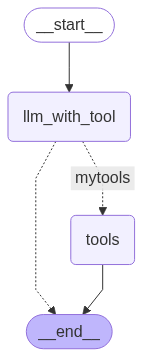

In [242]:
display(Image(app2.get_graph().draw_mermaid_png()))

In [243]:
app2.invoke({"messages":["What is the weather of Kolkata?"]})

{'messages': [HumanMessage(content='What is the weather of Kolkata?', additional_kwargs={}, response_metadata={}, id='225f1f1c-3f24-4d16-94fa-ee85a86acb94'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0zbrbh6rv', 'function': {'arguments': '{"query":"Kolkata"}', 'name': 'temp_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 71, 'prompt_tokens': 132, 'total_tokens': 203, 'completion_time': 0.377464313, 'prompt_time': 0.010553042, 'queue_time': 0.054456975000000005, 'total_time': 0.388017355}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4a05f3b7-d63a-41cd-8820-0aed880f1ef3-0', tool_calls=[{'name': 'temp_search', 'args': {'query': 'Kolkata'}, 'id': '0zbrbh6rv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 71, 'total_tokens': 203}),
  ToolMessage(content='The temp is 25 C and cloudy.', name='temp_s

In [244]:
app2.invoke({"messages":["What is the weather of Delhi?"]})

{'messages': [HumanMessage(content='What is the weather of Delhi?', additional_kwargs={}, response_metadata={}, id='3cba0dce-96df-4c84-8087-e2eb38a92bd1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'hdfse7qt6', 'function': {'arguments': '{"query":"Delhi"}', 'name': 'temp_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 82, 'prompt_tokens': 132, 'total_tokens': 214, 'completion_time': 0.368358712, 'prompt_time': 0.016254741, 'queue_time': 0.05409396899999999, 'total_time': 0.384613453}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f984cddb-c1c5-4eb7-8dde-775e0dfc0bae-0', tool_calls=[{'name': 'temp_search', 'args': {'query': 'Delhi'}, 'id': 'hdfse7qt6', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 82, 'total_tokens': 214}),
  ToolMessage(content='The Temp is 45 C and sunny.', name='temp_search', 

In [245]:
app2.invoke({"messages":["What is the capital of India?"]})

{'messages': [HumanMessage(content='What is the capital of India?', additional_kwargs={}, response_metadata={}, id='582f2189-703b-4cf3-9e97-a857990cd82d'),
  AIMessage(content="I'm unable to assist with that query as it's outside of my available tools.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 180, 'prompt_tokens': 132, 'total_tokens': 312, 'completion_time': 1.077674959, 'prompt_time': 0.049463975, 'queue_time': 0.056742425000000006, 'total_time': 1.127138934}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--84a38124-b09f-45da-99e2-c0724cdbf83f-0', usage_metadata={'input_tokens': 132, 'output_tokens': 180, 'total_tokens': 312})]}

In [246]:
app2.invoke({"messages":["Hi"]})

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}, id='66c9dd04-e19a-4d57-b180-1a83015f3af1'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'tp0nkbwjm', 'function': {'arguments': '{"query":"Paris"}', 'name': 'temp_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 121, 'prompt_tokens': 126, 'total_tokens': 247, 'completion_time': 0.666552539, 'prompt_time': 0.008227714, 'queue_time': 0.055305086, 'total_time': 0.674780253}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--88a91a0e-4427-4bd0-855f-45be07f9157d-0', tool_calls=[{'name': 'temp_search', 'args': {'query': 'Paris'}, 'id': 'tp0nkbwjm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 126, 'output_tokens': 121, 'total_tokens': 247}),
  ToolMessage(content='The temp is 25 C and cloudy.', name='temp_search', id='fadda5b8-b2ef-42c7-ad6b-c07e

In [247]:
response=app2.invoke({"messages":["What is the capital of India?"]})
print(response['messages'][-1].content)

The Temp is 45 C and sunny.


In [248]:
workflow2.add_edge('tools','llm_with_tool')

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


In [249]:
app3=workflow2.compile()

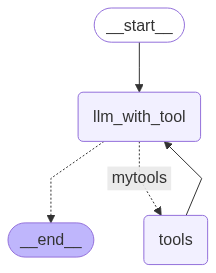

In [250]:
display(Image(app3.get_graph().draw_mermaid_png()))

In [251]:
for output in app3.stream({"messages":["What is the weather in delhi?"]}):

    for key,value in output.items():
        print("This is from node: ",key)
        print("--------")
        print(value)
        print("\n")

This is from node:  llm_with_tool
--------
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'pbc3nqme3', 'function': {'arguments': '{"query":"Delhi"}', 'name': 'temp_search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 112, 'prompt_tokens': 133, 'total_tokens': 245, 'completion_time': 0.433941008, 'prompt_time': 0.00856371, 'queue_time': 0.05568392999999999, 'total_time': 0.442504718}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--d970f807-84b6-4a3a-9cea-65498cd13dd3-0', tool_calls=[{'name': 'temp_search', 'args': {'query': 'Delhi'}, 'id': 'pbc3nqme3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 133, 'output_tokens': 112, 'total_tokens': 245})]}


This is from node:  tools
--------
{'messages': [ToolMessage(content='The Temp is 45 C and sunny.', name='temp_search', id='f15a1897-3861-482f-a1d8-d66f1ddde183', tool_ca

In [252]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()

In [257]:
workflow3=StateGraph(MessagesState)
workflow3.add_node('llm_with_tool',call_model)
workflow3.add_node('tools',tool_node)
workflow3.add_edge(START,'llm_with_tool')
workflow3.add_conditional_edges(
    "llm_with_tool",router_function,
    {"mytools":"tools",
     END:END}
)
workflow3.add_edge('tools','llm_with_tool')

In [258]:
app4=workflow3.compile(checkpointer=memory)

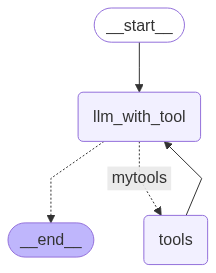

In [259]:
display(Image(app4.get_graph().draw_mermaid_png()))

In [260]:
config={"configurable":{"thread_id":"1"}}

In [261]:
events=app4.stream({"messages":["What is the weather in new delhi?"]},config=config,stream_mode='values')

In [262]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  temp_search (vj0wtxgv7)
 Call ID: vj0wtxgv7
  Args:
    query: New Delhi
================================= Tool Message =================================
Name: temp_search

The Temp is 45 C and sunny.
================================== Ai Message ==================================
Tool Calls:
  temp_search (1bdtnmy0a)
 Call ID: 1bdtnmy0a
  Args:
    query: New Delhi
================================= Tool Message =================================
Name: temp_search

The Temp is 45 C and sunny.
================================== Ai Message ==================================

The temperature in New Delhi is 45°C and sunny.


In [263]:
events=app4.stream({"messages":["What is the weather in kolkata?"]},config=config,stream_mode='values')

In [264]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the weather in kolkata?
================================== Ai Message ==================================
Tool Calls:
  temp_search (4nxwm5800)
 Call ID: 4nxwm5800
  Args:
    query: Kolkata
================================= Tool Message =================================
Name: temp_search

The temp is 25 C and cloudy.
================================== Ai Message ==================================

The weather in Kolkata is 25°C and cloudy.


In [265]:
events=app4.stream({"messages":["What is the capital of India?"]},config=config,stream_mode='values')

In [266]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

What is the capital of India?
================================== Ai Message ==================================

The capital of India is New Delhi.


In [267]:
memory.get(config=config)

{'v': 3,
 'ts': '2025-06-25T03:56:18.207370+00:00',
 'id': '1f051785-9260-616a-800d-fb5bbe3b9a38',
 'channel_versions': {'__start__': '00000000000000000000000000000014.0.5637555941791194',
  'messages': '00000000000000000000000000000015.0.8105873318776151',
  'branch:to:llm_with_tool': '00000000000000000000000000000015.0.30861765895460613',
  'branch:to:tools': '00000000000000000000000000000011.0.21638303998599473'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000013.0.9916365064089692'},
  'llm_with_tool': {'branch:to:llm_with_tool': '00000000000000000000000000000014.0.2628413535001659'},
  'tools': {'branch:to:tools': '00000000000000000000000000000010.0.03465891137817245'}},
 'channel_values': {'messages': [HumanMessage(content='What is the weather in new delhi?', additional_kwargs={}, response_metadata={}, id='f070b649-3383-42a6-9266-a1f26be13d60'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vj0wtxgv7', 'functio

In [268]:
events=app4.stream({"messages":["In which city the temp is 45 degree?"]},config=config,stream_mode='values')

In [269]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

In which city the temp is 45 degree?
================================== Ai Message ==================================

The temperature in New Delhi is 45 degrees.


In [270]:
memory.get(config=config)

{'v': 3,
 'ts': '2025-06-25T04:01:13.648329+00:00',
 'id': '1f051790-93eb-67dc-8010-42e5a7c6c1ca',
 'channel_versions': {'__start__': '00000000000000000000000000000017.0.5276229719847891',
  'messages': '00000000000000000000000000000018.0.6754163629953427',
  'branch:to:llm_with_tool': '00000000000000000000000000000018.0.8884870544873068',
  'branch:to:tools': '00000000000000000000000000000011.0.21638303998599473'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000016.0.12046425109405945'},
  'llm_with_tool': {'branch:to:llm_with_tool': '00000000000000000000000000000017.0.6360524313945811'},
  'tools': {'branch:to:tools': '00000000000000000000000000000010.0.03465891137817245'}},
 'channel_values': {'messages': [HumanMessage(content='What is the weather in new delhi?', additional_kwargs={}, response_metadata={}, id='f070b649-3383-42a6-9266-a1f26be13d60'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vj0wtxgv7', 'functio